## Projet  : Online Portfolio Allocation ##

### I - Time Series ###

**Import des packages**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install --upgrade numpy statsmodels
!pip install --upgrade pandas statsmodels
!pip install numpy==1.21.0
!pip install shap

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.18.3 requires Pillow<=8.2.0, but you have pillow 10.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.10.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2



  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.18.3 requires Pillow<=8.2.0, but you have pillow 10.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.0 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.10.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached numpy-1.21.0-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
Using cached numpy-1.21.0-cp38-cp38-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
import shap
import random

### Importation de la table info + PREPROCESSING ###

### Acquisition des données ###

In [4]:
df = pd.read_csv("complete_unprocessed_df.csv")
df.head()

,isin,shortName,symbol,marketCap,longName,country,address1,address2,zip,city,...,Earnings From Equity Interest,Other Taxes,Depreciation Amortization Depletion Income Statement,Earnings From Equity Interest Net Of Tax,Amortization Of Intangibles Income Statement,Net Income From Tax Loss Carryforward,Provision For Doubtful Accounts,Depletion Income Statement,Securities Amortization,Excise Taxes
0,PLNFI0600010,06MAGNA,06N.WA,1.000724e+07,Magna Polonia S.A.,Poland,Grzybowska 4 lok. 96,NaN,00-131,Warsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLNFI0600010,06MAGNA,06N.WA,1.000724e+07,Magna Polonia S.A.,Poland,Grzybowska 4 lok. 96,NaN,00-131,Warsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PLNFI0600010,06MAGNA,06N.WA,1.000724e+07,Magna Polonia S.A.,Poland,Grzybowska 4 lok. 96,NaN,00-131,Warsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PLNFI0600010,06MAGNA,06N.WA,1.000724e+07,Magna Polonia S.A.,Poland,Grzybowska 4 lok. 96,NaN,00-131,Warsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PLNFI0800016,08OCTAVA,08N.WA,9.891529e+06,NFI Octava S.A.,Poland,Krakowskie Przedmiescie 4/6,NaN,00-333,Warsaw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Selectionner les info des entreprises les plus performantes avec le isin**

In [5]:
df = df[df["isin"].isin(['NO0006001205', 'FO0000000088', 'DE0005190003', 'DE0005190037',
       'DK0060000107', 'NO0006001007', 'NO0010029804', 'DK0060133841',
       'NO0006001601','PLDMDVL00012'])]

**Comptage**

In [6]:
dfinfo = df[["isin","longName","marketCap"]].sort_values(by="marketCap", ascending=False)
dfinfo = dfinfo.drop_duplicates()
dfinfo = dfinfo.reset_index(drop=True)
dfinfo

,isin,longName,marketCap
0,DE0005190003,Bayerische Motoren Werke Aktiengesellschaft,7.048289e+10
1,DE0005190037,Bayerische Motoren Werke Aktiengesellschaft,6.995573e+10
2,PLDMDVL00012,Dom Development S.A.,1.046107e+09
3,NO0010029804,SpareBank 1 Helgeland,3.029969e+08
4,FO0000000088,Føroya Banki,1.964885e+08
5,NO0006001007,Sandnes Sparebank,1.866978e+08
6,NO0006001205,Totens Sparebank,1.205076e+08
7,NO0006001601,Aurskog Sparebank,8.770689e+07
8,DK0060000107,Lollands Bank A/S,8.402414e+07
9,DK0060133841,Møns Bank A/S,6.304494e+07


In [7]:
dfinfo.loc[dfinfo["isin"] == "DE0005190003", "longName"] = "BMW"
dfinfo.loc[dfinfo["isin"] == "DE0005190037", "longName"] = "BMW VZ"
dfinfo

,isin,longName,marketCap
0,DE0005190003,BMW,7.048289e+10
1,DE0005190037,BMW VZ,6.995573e+10
2,PLDMDVL00012,Dom Development S.A.,1.046107e+09
3,NO0010029804,SpareBank 1 Helgeland,3.029969e+08
4,FO0000000088,Føroya Banki,1.964885e+08
5,NO0006001007,Sandnes Sparebank,1.866978e+08
6,NO0006001205,Totens Sparebank,1.205076e+08
7,NO0006001601,Aurskog Sparebank,8.770689e+07
8,DK0060000107,Lollands Bank A/S,8.402414e+07
9,DK0060133841,Møns Bank A/S,6.304494e+07


**Affichage des données**

In [8]:
dfinfo["isin"]
colNames = dfinfo["longName"]
colNames

0                      BMW
1                   BMW VZ
2     Dom Development S.A.
3    SpareBank 1 Helgeland
4             Føroya Banki
5        Sandnes Sparebank
6         Totens Sparebank
7        Aurskog Sparebank
8        Lollands Bank A/S
9            Møns Bank A/S
Name: longName, dtype: object

**Récupèrer diverses informations: Date + La valeur du cours pour l'ouverture et la fermeture + le volume d'actions et les dividendes**

In [9]:
df_timeSeries = pd.DataFrame()
for row, isin in enumerate(dfinfo["isin"]):
    filename = isin+'_historical_market_data.csv'
    dataframe = pd.read_csv("historical"+"/"+filename, header = 0, index_col = "Date", 
                            parse_dates = True, usecols = ["Date","Close","Volume","Dividends"])
    dataframe = dataframe.rename(columns={'Close': 'C_'+ dfinfo["longName"][row]})
    dataframe = dataframe.rename(columns={'Volume': 'V_'+ dfinfo["longName"][row]})
    dataframe = dataframe.rename(columns={'Dividends': 'D_'+ dfinfo["longName"][row]})
    df_timeSeries = pd.merge(df_timeSeries, dataframe, left_index=True, right_index=True, how='outer')
df_timeSeries =df_timeSeries.drop_duplicates()

In [10]:
df_timeSeries.loc["2022-12-22"]

C_BMW                      7.676817e+01
V_BMW                      1.129869e+06
D_BMW                      0.000000e+00
C_BMW VZ                   7.304914e+01
V_BMW VZ                   7.072700e+04
D_BMW VZ                   0.000000e+00
C_Dom Development S.A.     8.931068e+01
V_Dom Development S.A.     1.801200e+04
D_Dom Development S.A.     0.000000e+00
C_SpareBank 1 Helgeland    9.660262e+01
V_SpareBank 1 Helgeland    7.263000e+03
D_SpareBank 1 Helgeland    0.000000e+00
C_Føroya Banki             1.070805e+02
V_Føroya Banki             7.105000e+03
D_Føroya Banki             0.000000e+00
C_Sandnes Sparebank        8.405462e+01
V_Sandnes Sparebank        2.019200e+04
D_Sandnes Sparebank        0.000000e+00
C_Totens Sparebank         1.784513e+02
V_Totens Sparebank         6.040000e+03
D_Totens Sparebank         0.000000e+00
C_Aurskog Sparebank        1.955505e+02
V_Aurskog Sparebank        2.920000e+02
D_Aurskog Sparebank        0.000000e+00
C_Lollands Bank A/S        5.460000e+02


In [11]:
df_timeSeries

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,D_Totens Sparebank,C_Aurskog Sparebank,V_Aurskog Sparebank,D_Aurskog Sparebank,C_Lollands Bank A/S,V_Lollands Bank A/S,D_Lollands Bank A/S,C_Møns Bank A/S,V_Møns Bank A/S,D_Møns Bank A/S
Date,,,,,,,,,,,,,,,,,,,,,
1996-11-08,8.806278,767000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-11,8.782532,260000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-12,8.848927,1066000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-13,8.834870,793000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-14,8.863465,351000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,106.959999,785748.0,0.0,99.400002,90230.0,0.0,175.399994,1380.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-02,106.650002,1084212.0,0.0,98.800003,94944.0,0.0,177.000000,2373.0,0.0,129.0,...,0.0,215.0,2.0,0.0,570.0,187.0,0.0,236.0,1266.0,0.0
2024-04-03,111.849998,1830218.0,0.0,102.699997,99890.0,0.0,179.000000,1903.0,0.0,127.0,...,0.0,215.0,5073.0,0.0,570.0,294.0,0.0,236.0,1820.0,0.0


In [12]:
df_timeSeries.describe()

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,D_Totens Sparebank,C_Aurskog Sparebank,V_Aurskog Sparebank,D_Aurskog Sparebank,C_Lollands Bank A/S,V_Lollands Bank A/S,D_Lollands Bank A/S,C_Møns Bank A/S,V_Møns Bank A/S,D_Møns Bank A/S
count,6997.000000,6.997000e+03,6997.000000,6562.000000,6.562000e+03,6562.000000,4453.000000,4453.000000,4453.000000,4086.000000,...,4086.000000,2315.000000,2315.000000,2315.000000,4893.000000,4893.000000,4893.000000,6118.000000,6118.000000,6118.000000
mean,37.659893,2.142709e+06,0.007232,29.829918,8.152070e+04,0.007951,44.960006,7850.684033,0.019261,51.435638,...,0.025106,109.573847,1396.133909,0.054852,294.089315,619.543429,0.011854,118.310729,1743.803531,0.006813
std,24.108899,1.470155e+06,0.168385,22.635978,8.083576e+04,0.175269,36.703051,18854.082430,0.384386,31.592678,...,0.462453,51.815520,4518.967122,0.662471,150.317406,2333.540467,0.307747,56.409954,7152.922372,0.145311
min,8.767994,0.000000e+00,0.000000,4.072023,0.000000e+00,0.000000,5.436437,0.000000,0.000000,14.594508,...,0.000000,31.312693,0.000000,0.000000,85.326355,0.000000,0.000000,31.333187,0.000000,0.000000
25%,17.789637,1.229513e+06,0.000000,11.102384,3.891200e+04,0.000000,17.828726,795.000000,0.000000,23.287544,...,0.000000,69.143394,41.500000,0.000000,162.395325,80.000000,0.000000,78.164515,61.000000,0.000000
50%,25.830397,1.829185e+06,0.000000,20.789749,6.315150e+04,0.000000,29.185211,2388.000000,0.000000,40.824226,...,0.000000,94.144196,326.000000,0.000000,279.668335,275.000000,0.000000,104.323288,408.000000,0.000000
75%,56.798618,2.666983e+06,0.000000,45.170317,9.750950e+04,0.000000,59.680408,7062.000000,0.000000,66.785965,...,0.000000,140.446869,1305.500000,0.000000,373.677826,650.000000,0.000000,157.607430,1194.750000,0.000000
max,114.699997,2.871954e+07,8.500000,105.400002,1.498018e+06,8.520000,182.399994,336483.000000,11.000000,132.000000,...,14.570000,216.000000,147966.000000,15.000000,640.000000,115389.000000,10.000000,255.517242,248103.000000,4.041668


In [13]:
df_top10 = df_timeSeries
df_top10.isna().sum()
df_top10.shape
df_top10

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,D_Totens Sparebank,C_Aurskog Sparebank,V_Aurskog Sparebank,D_Aurskog Sparebank,C_Lollands Bank A/S,V_Lollands Bank A/S,D_Lollands Bank A/S,C_Møns Bank A/S,V_Møns Bank A/S,D_Møns Bank A/S
Date,,,,,,,,,,,,,,,,,,,,,
1996-11-08,8.806278,767000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-11,8.782532,260000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-12,8.848927,1066000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-13,8.834870,793000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-14,8.863465,351000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,106.959999,785748.0,0.0,99.400002,90230.0,0.0,175.399994,1380.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-02,106.650002,1084212.0,0.0,98.800003,94944.0,0.0,177.000000,2373.0,0.0,129.0,...,0.0,215.0,2.0,0.0,570.0,187.0,0.0,236.0,1266.0,0.0
2024-04-03,111.849998,1830218.0,0.0,102.699997,99890.0,0.0,179.000000,1903.0,0.0,127.0,...,0.0,215.0,5073.0,0.0,570.0,294.0,0.0,236.0,1820.0,0.0


### PREPROCESSING ###

**Mise en place fréquence**

In [14]:
df_top10 = df_top10.asfreq('D')
df_top10

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,D_Totens Sparebank,C_Aurskog Sparebank,V_Aurskog Sparebank,D_Aurskog Sparebank,C_Lollands Bank A/S,V_Lollands Bank A/S,D_Lollands Bank A/S,C_Møns Bank A/S,V_Møns Bank A/S,D_Møns Bank A/S
Date,,,,,,,,,,,,,,,,,,,,,
1996-11-08,8.806278,767000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-11,8.782532,260000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-12,8.848927,1066000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-02,106.650002,1084212.0,0.0,98.800003,94944.0,0.0,177.000000,2373.0,0.0,129.0,...,0.0,215.0,2.0,0.0,570.0,187.0,0.0,236.0,1266.0,0.0
2024-04-03,111.849998,1830218.0,0.0,102.699997,99890.0,0.0,179.000000,1903.0,0.0,127.0,...,0.0,215.0,5073.0,0.0,570.0,294.0,0.0,236.0,1820.0,0.0


**Remplacement des valeurs nulles**

In [15]:
print(df_top10.isnull().mean())

C_BMW                      0.301069
V_BMW                      0.301069
D_BMW                      0.301069
C_BMW VZ                   0.344521
V_BMW VZ                   0.344521
D_BMW VZ                   0.344521
C_Dom Development S.A.     0.555189
V_Dom Development S.A.     0.555189
D_Dom Development S.A.     0.555189
C_SpareBank 1 Helgeland    0.591849
V_SpareBank 1 Helgeland    0.591849
D_SpareBank 1 Helgeland    0.591849
C_Føroya Banki             0.580761
V_Føroya Banki             0.580761
D_Føroya Banki             0.580761
C_Sandnes Sparebank        0.591749
V_Sandnes Sparebank        0.591749
D_Sandnes Sparebank        0.591749
C_Totens Sparebank         0.591849
V_Totens Sparebank         0.591849
D_Totens Sparebank         0.591849
C_Aurskog Sparebank        0.768754
V_Aurskog Sparebank        0.768754
D_Aurskog Sparebank        0.768754
C_Lollands Bank A/S        0.511238
V_Lollands Bank A/S        0.511238
D_Lollands Bank A/S        0.511238
C_Møns Bank A/S            0

In [16]:
df_top10 = df_top10.fillna(df_top10.ffill())
df_top10 = df_top10.fillna(df_top10.bfill())

**Création dataframe filtré par année**

In [36]:
df_top10_filter = df_top10.loc['2018':'2023']

In [17]:
df_top10_filter = df_top10.loc['2023']

**Représentation graphique de la série pour la valeur Close et son return**

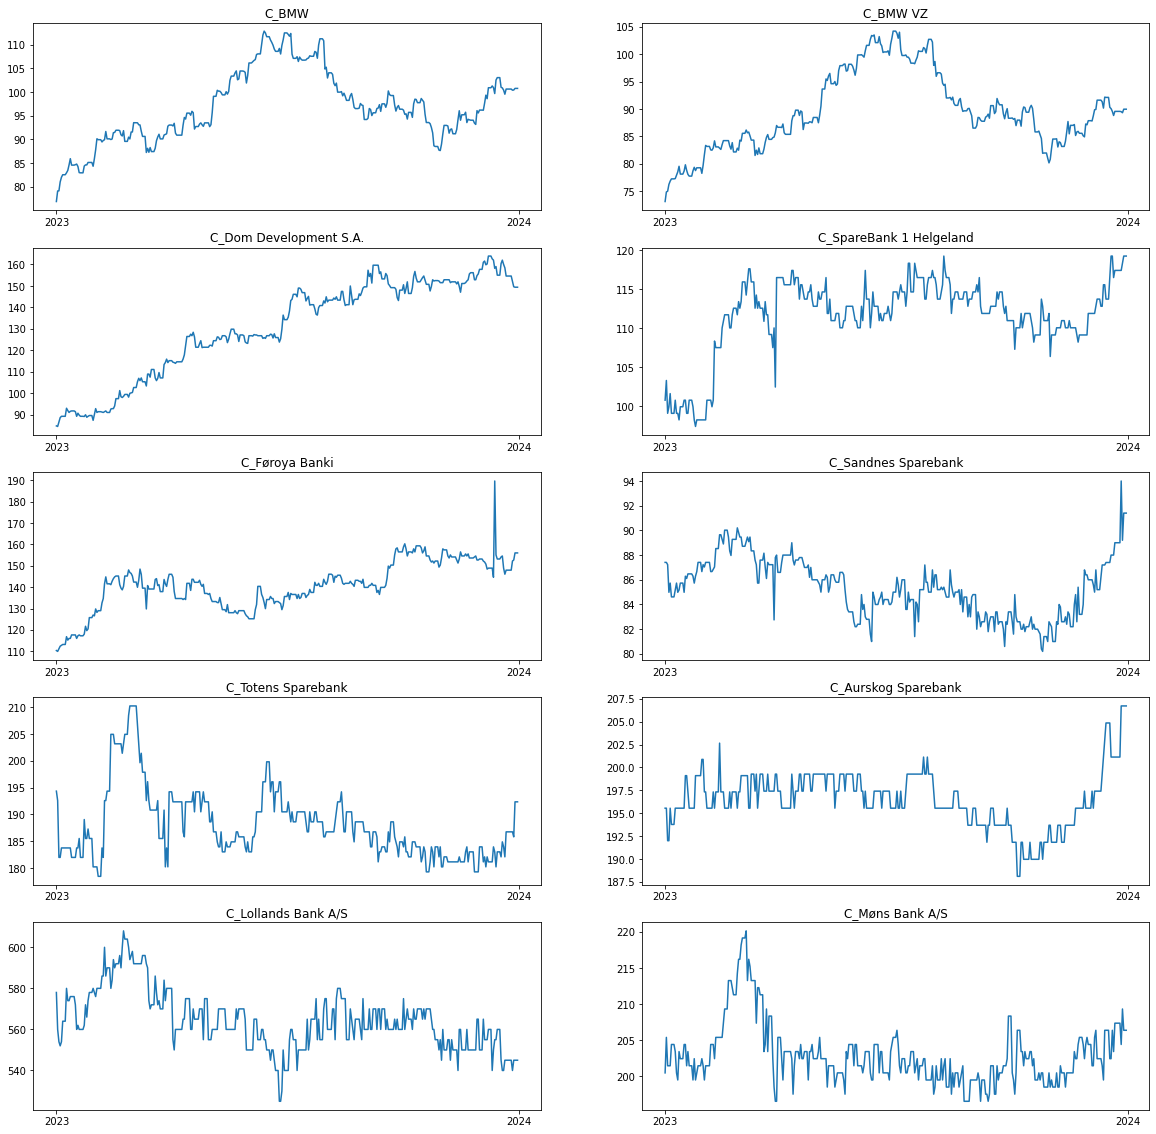

In [18]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
cpt = 0
step = 3

for i in range(0,5):
    name = "C_"+colNames[cpt]
    axs[i, 0].plot(df_top10_filter.filter(regex=f"{name}$", axis=1))
    axs[i, 0].set_title(name)
    axs[i, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axs[i, 0].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

    name = "C_"+colNames[cpt+1]
    axs[i, 1].plot(df_top10_filter.filter(regex=f"{name}$", axis=1))
    axs[i, 1].set_title(name)
    axs[i, 1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axs[i, 1].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    cpt += 2
plt.show()

In [19]:
df_top10_filter

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,D_Totens Sparebank,C_Aurskog Sparebank,V_Aurskog Sparebank,D_Aurskog Sparebank,C_Lollands Bank A/S,V_Lollands Bank A/S,D_Lollands Bank A/S,C_Møns Bank A/S,V_Møns Bank A/S,D_Møns Bank A/S
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,76.841896,532248.0,0.0,73.095093,49843.0,0.0,84.845154,10543.0,0.0,100.802727,...,0.0,195.550461,6.0,0.0,578.0,1261.0,0.0,200.482758,2100.0,0.0
2023-01-02,79.072144,789996.0,0.0,74.840912,26338.0,0.0,84.577217,1226.0,0.0,103.322792,...,0.0,195.550461,400.0,0.0,560.0,353.0,0.0,205.396561,647.0,0.0
2023-01-03,79.099785,862444.0,0.0,74.978745,50899.0,0.0,86.631371,1432.0,0.0,99.122681,...,0.0,191.994980,642.0,0.0,554.0,197.0,0.0,201.465515,1029.0,0.0
2023-01-04,80.989037,1054287.0,0.0,76.219200,91441.0,0.0,88.685516,14015.0,0.0,99.962700,...,0.0,191.994980,1339.0,0.0,552.0,56.0,0.0,201.465515,65.0,0.0
2023-01-05,81.975136,960298.0,0.0,76.816460,92086.0,0.0,89.310684,2027.0,0.0,101.642754,...,0.0,195.550461,50.0,0.0,554.0,390.0,0.0,201.465515,328.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,100.400002,461826.0,0.0,89.500000,27612.0,0.0,152.000000,12134.0,0.0,117.395691,...,0.0,206.724762,171.0,0.0,540.0,705.0,0.0,204.413803,581.0,0.0
2023-12-28,100.440002,430616.0,0.0,89.300003,21828.0,0.0,149.600006,6039.0,0.0,118.312843,...,0.0,206.724762,0.0,0.0,545.0,976.0,0.0,209.327591,1056.0,0.0
2023-12-29,100.779999,342418.0,0.0,89.949997,20825.0,0.0,149.399994,6502.0,0.0,119.229996,...,0.0,206.724762,1.0,0.0,545.0,135.0,0.0,206.379318,1039.0,0.0


**Mise au point du return = performance d'un jour par rapport à J-1**

In [20]:
df_top10_filter.columns

Index(['C_BMW', 'V_BMW', 'D_BMW', 'C_BMW VZ', 'V_BMW VZ', 'D_BMW VZ',
       'C_Dom Development S.A.', 'V_Dom Development S.A.',
       'D_Dom Development S.A.', 'C_SpareBank 1 Helgeland',
       'V_SpareBank 1 Helgeland', 'D_SpareBank 1 Helgeland', 'C_Føroya Banki',
       'V_Føroya Banki', 'D_Føroya Banki', 'C_Sandnes Sparebank',
       'V_Sandnes Sparebank', 'D_Sandnes Sparebank', 'C_Totens Sparebank',
       'V_Totens Sparebank', 'D_Totens Sparebank', 'C_Aurskog Sparebank',
       'V_Aurskog Sparebank', 'D_Aurskog Sparebank', 'C_Lollands Bank A/S',
       'V_Lollands Bank A/S', 'D_Lollands Bank A/S', 'C_Møns Bank A/S',
       'V_Møns Bank A/S', 'D_Møns Bank A/S'],
      dtype='object')

In [21]:
for i , name_col in enumerate(colNames):
    df_top10_filter["C_" + name_col + "_return"] = None
    for row in range(0, len(df_top10_filter)-1):
        df_top10_filter["C_" + name_col+ "_return"][row] = ((df_top10_filter["C_" + name_col][row+1] + df_top10_filter["D_" + name_col][row])  - df_top10_filter["C_" + name_col][row])/df_top10_filter["C_" + name_col][row]
        df_top10_filter.fillna(0, inplace=True)
        df_top10_filter.replace([np.inf, -np.inf], 0, inplace=True)

In [22]:
df_top10_filter

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,76.841896,532248.0,0.0,73.095093,49843.0,0.0,84.845154,10543.0,0.0,100.802727,...,0.029024,0.023884,-0.003158,0.025000,-0.003676,0.000000,-0.009091,0.000000,-0.031142,0.024510
2023-01-02,79.072144,789996.0,0.0,74.840912,26338.0,0.0,84.577217,1226.0,0.0,103.322792,...,0.000350,0.001842,0.024287,-0.040650,0.011070,-0.002132,-0.055046,-0.018182,-0.010714,-0.019139
2023-01-03,79.099785,862444.0,0.0,74.978745,50899.0,0.0,86.631371,1432.0,0.0,99.122681,...,0.023884,0.016544,0.023711,0.008475,0.010949,-0.025641,0.000000,0.000000,-0.003610,0.000000
2023-01-04,80.989037,1054287.0,0.0,76.219200,91441.0,0.0,88.685516,14015.0,0.0,99.962700,...,0.012176,0.007836,0.007049,0.016807,0.003610,0.008772,0.009709,0.018519,0.003623,0.000000
2023-01-05,81.975136,960298.0,0.0,76.816460,92086.0,0.0,89.310684,2027.0,0.0,101.642754,...,0.006521,0.005383,0.000000,-0.024793,0.003597,-0.013043,0.000000,-0.009091,0.018051,0.014634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,100.400002,461826.0,0.0,89.500000,27612.0,0.0,152.000000,12134.0,0.0,117.395691,...,0.000398,-0.002235,-0.015789,0.007812,0.003115,-0.051064,-0.005000,0.000000,0.009259,0.024038
2023-12-28,100.440002,430616.0,0.0,89.300003,21828.0,0.0,149.600006,6039.0,0.0,118.312843,...,0.003385,0.007279,-0.001337,0.007752,0.021739,0.024664,0.035176,0.000000,0.000000,-0.014084
2023-12-29,100.779999,342418.0,0.0,89.949997,20825.0,0.0,149.399994,6502.0,0.0,119.229996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
df_top10_filter.isnull().sum()

C_BMW                             0
V_BMW                             0
D_BMW                             0
C_BMW VZ                          0
V_BMW VZ                          0
D_BMW VZ                          0
C_Dom Development S.A.            0
V_Dom Development S.A.            0
D_Dom Development S.A.            0
C_SpareBank 1 Helgeland           0
V_SpareBank 1 Helgeland           0
D_SpareBank 1 Helgeland           0
C_Føroya Banki                    0
V_Føroya Banki                    0
D_Føroya Banki                    0
C_Sandnes Sparebank               0
V_Sandnes Sparebank               0
D_Sandnes Sparebank               0
C_Totens Sparebank                0
V_Totens Sparebank                0
D_Totens Sparebank                0
C_Aurskog Sparebank               0
V_Aurskog Sparebank               0
D_Aurskog Sparebank               0
C_Lollands Bank A/S               0
V_Lollands Bank A/S               0
D_Lollands Bank A/S               0
C_Møns Bank A/S             

**Affichage de données**

In [24]:
df_top10_filter

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,76.841896,532248.0,0.0,73.095093,49843.0,0.0,84.845154,10543.0,0.0,100.802727,...,0.029024,0.023884,-0.003158,0.025000,-0.003676,0.000000,-0.009091,0.000000,-0.031142,0.024510
2023-01-02,79.072144,789996.0,0.0,74.840912,26338.0,0.0,84.577217,1226.0,0.0,103.322792,...,0.000350,0.001842,0.024287,-0.040650,0.011070,-0.002132,-0.055046,-0.018182,-0.010714,-0.019139
2023-01-03,79.099785,862444.0,0.0,74.978745,50899.0,0.0,86.631371,1432.0,0.0,99.122681,...,0.023884,0.016544,0.023711,0.008475,0.010949,-0.025641,0.000000,0.000000,-0.003610,0.000000
2023-01-04,80.989037,1054287.0,0.0,76.219200,91441.0,0.0,88.685516,14015.0,0.0,99.962700,...,0.012176,0.007836,0.007049,0.016807,0.003610,0.008772,0.009709,0.018519,0.003623,0.000000
2023-01-05,81.975136,960298.0,0.0,76.816460,92086.0,0.0,89.310684,2027.0,0.0,101.642754,...,0.006521,0.005383,0.000000,-0.024793,0.003597,-0.013043,0.000000,-0.009091,0.018051,0.014634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,100.400002,461826.0,0.0,89.500000,27612.0,0.0,152.000000,12134.0,0.0,117.395691,...,0.000398,-0.002235,-0.015789,0.007812,0.003115,-0.051064,-0.005000,0.000000,0.009259,0.024038
2023-12-28,100.440002,430616.0,0.0,89.300003,21828.0,0.0,149.600006,6039.0,0.0,118.312843,...,0.003385,0.007279,-0.001337,0.007752,0.021739,0.024664,0.035176,0.000000,0.000000,-0.014084
2023-12-29,100.779999,342418.0,0.0,89.949997,20825.0,0.0,149.399994,6502.0,0.0,119.229996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
df_top10_return = df_top10_filter.iloc[:,-10:]
df_top10_return

,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,
2023-01-01,0.029024,0.023884,-0.003158,0.025000,-0.003676,0.000000,-0.009091,0.000000,-0.031142,0.024510
2023-01-02,0.000350,0.001842,0.024287,-0.040650,0.011070,-0.002132,-0.055046,-0.018182,-0.010714,-0.019139
2023-01-03,0.023884,0.016544,0.023711,0.008475,0.010949,-0.025641,0.000000,0.000000,-0.003610,0.000000
2023-01-04,0.012176,0.007836,0.007049,0.016807,0.003610,0.008772,0.009709,0.018519,0.003623,0.000000
2023-01-05,0.006521,0.005383,0.000000,-0.024793,0.003597,-0.013043,0.000000,-0.009091,0.018051,0.014634
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.000398,-0.002235,-0.015789,0.007812,0.003115,-0.051064,-0.005000,0.000000,0.009259,0.024038
2023-12-28,0.003385,0.007279,-0.001337,0.007752,0.021739,0.024664,0.035176,0.000000,0.000000,-0.014084
2023-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Graphique sur la fermeture du cours pour le return**

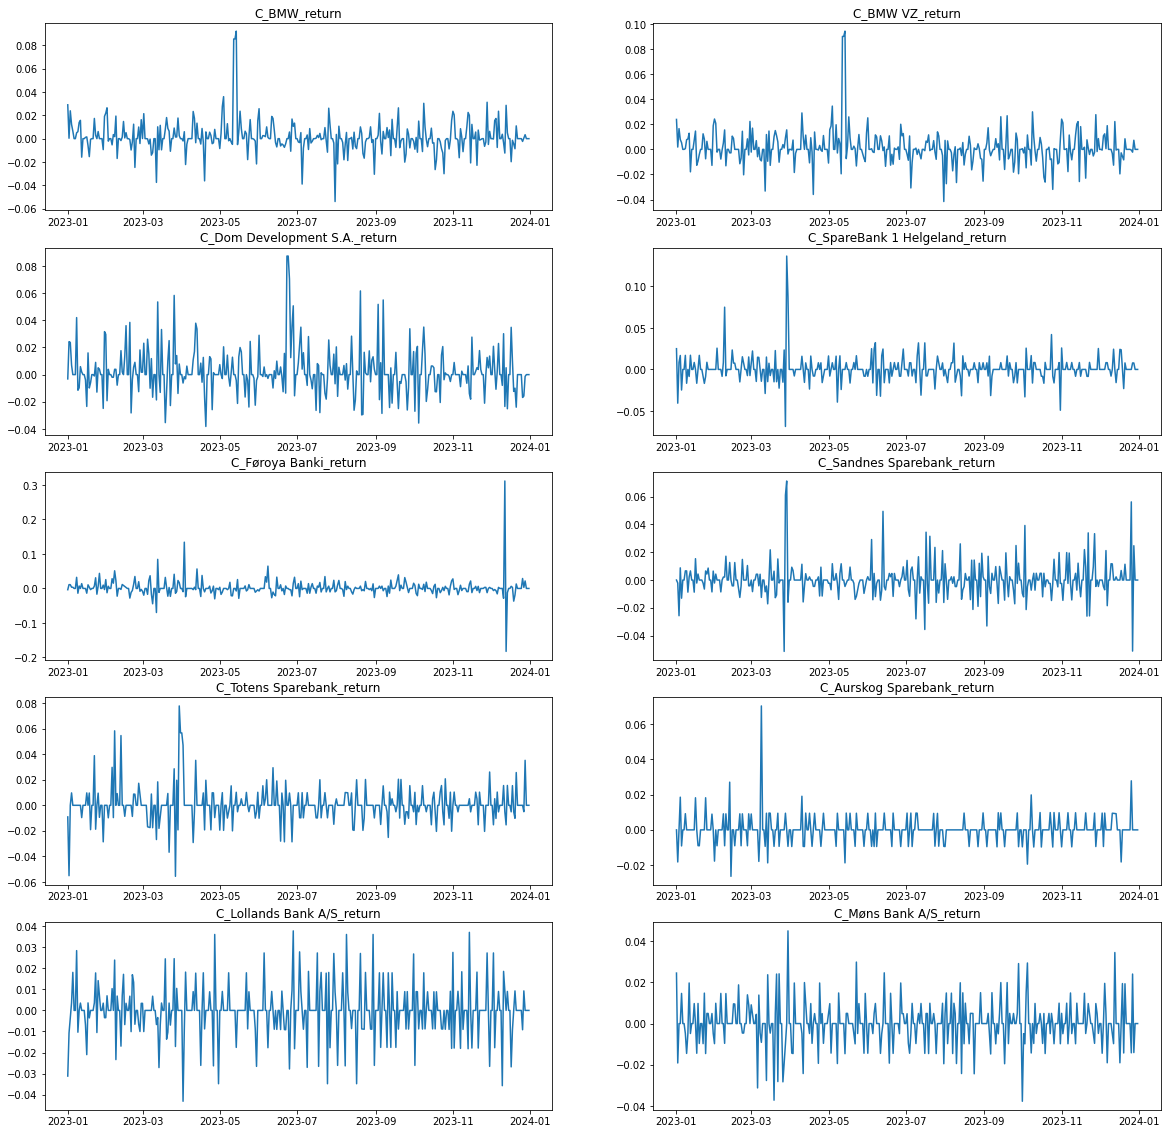

In [27]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
entCpt = 0

for i in range(5):
    for j in range(2):
            axs[i, j].plot(df_top10_return[df_top10_return.columns[entCpt]])
            axs[i, j].set_title(df_top10_return.columns[entCpt])
            #axs[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
            #axs[i, j].xaxis.set_major_locator(mdates.YearLocator())
            entCpt += 1
plt.show()

**Analyse serie tempo:**
- Tendance de la série (croissant ou décroissant/ orientation générale (à long terme) de la série)
- Saisonalité de la série (motif répétitif)
- Résidu ou bruit (partie aléatoire hors tendance ou saisonalité)

**Differents types de modèle:** 
- Multiplicatif = croissance de la courbe de l'amplitide 
- Additif = amplitude constante

**Décompostion de la série**

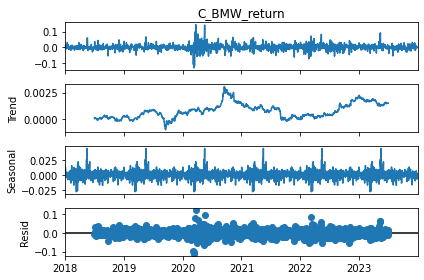

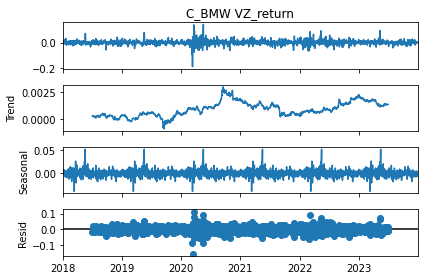

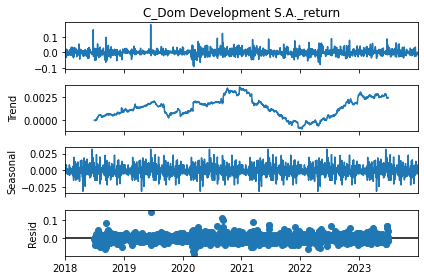

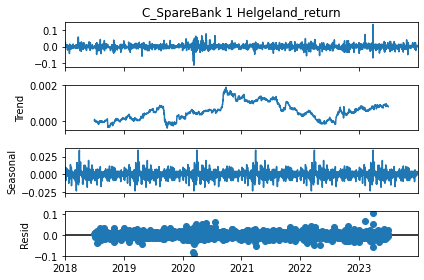

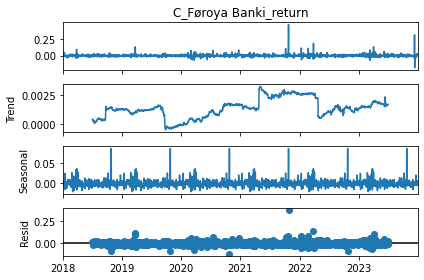

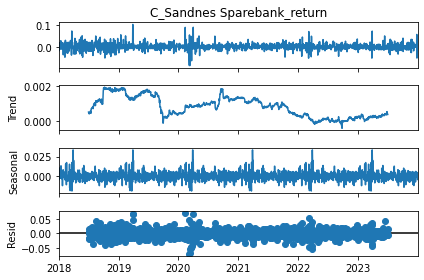

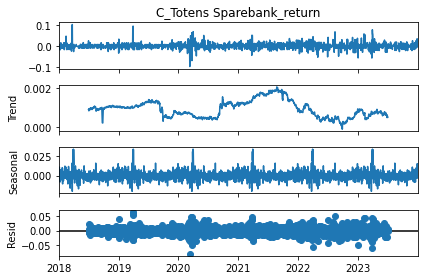

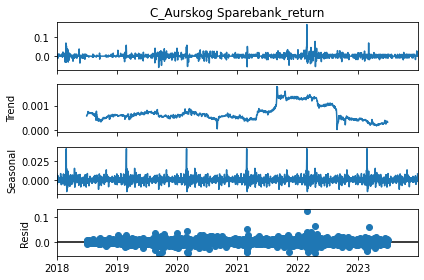

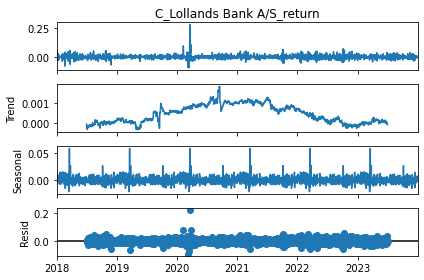

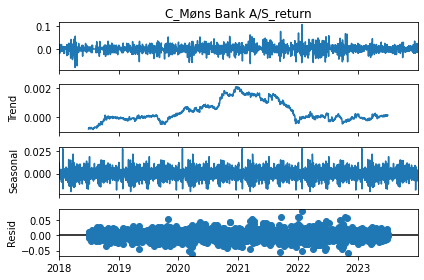

In [52]:
#valeur ne fait pas qu augmenter ou diminuer avec le temps donc additive
for i in range(0,10):
    decomp = seasonal_decompose(df_top10_return[df_top10_return.columns[i]], model='additive', period=365)
    decomp.plot()
    #col = df_top10_return.columns[i].replace('/', '')
    #plt.savefig('{}.jpg'.format(col), bbox_inches='tight', transparent=False)
plt.show()

**Moyenne mobile pour analyser la tendance du return**

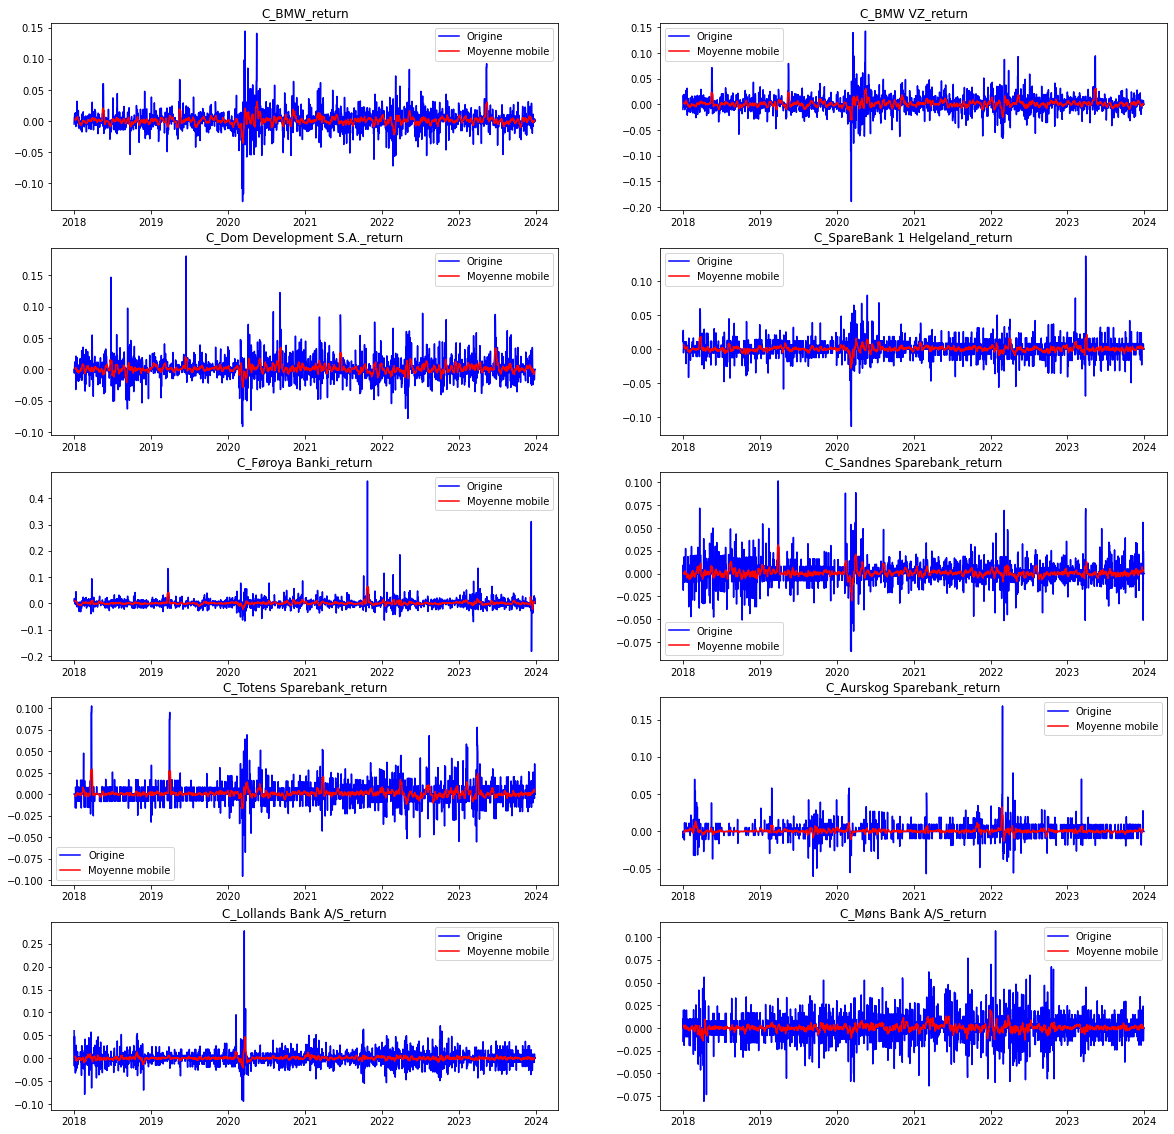

In [53]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
entCpt = 0
moyMobile = []

for i in range(5):
    for j in range(2):
        courslog = df_top10_return[df_top10_return.columns[entCpt]]
        cours_ma = courslog.rolling(window = 10, center = True).mean()
        moyMobile.append(cours_ma)


        axs[i, j].plot(courslog, color = 'blue', label = 'Origine')
        axs[i, j].plot(cours_ma, color = 'red', label = 'Moyenne mobile')
        axs[i, j].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
        axs[i, j].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
        axs[i, j].legend()
        axs[i, j].set_title(df_top10_return.columns[entCpt])
        entCpt += 1
plt.show()

**Differenciation des series**
   - Pour appliquer des modèles, il faut effectuer une stationnalisation :
        - Différentiation (suppression de la tendance)
        - Moyenne constante et variance constante
        
--> Serie déjà stationnaire (la tendance n'augmente pas avec le temps de façon croissante/l'amplitude reste constante) 

### Mise en place des modèles ###

**Application du modèle SARIMAX pour la fermeture des cours**

*Séparation train et test*

In [95]:
df_train = df_top10_return.loc['2018':'2022']
df_test = df_top10_return.loc['2023']

Maximum Likelihood optimization failed to converge. Check mle_retvals
Maximum Likelihood optimization failed to converge. Check mle_retvals
Maximum Likelihood optimization failed to converge. Check mle_retvals


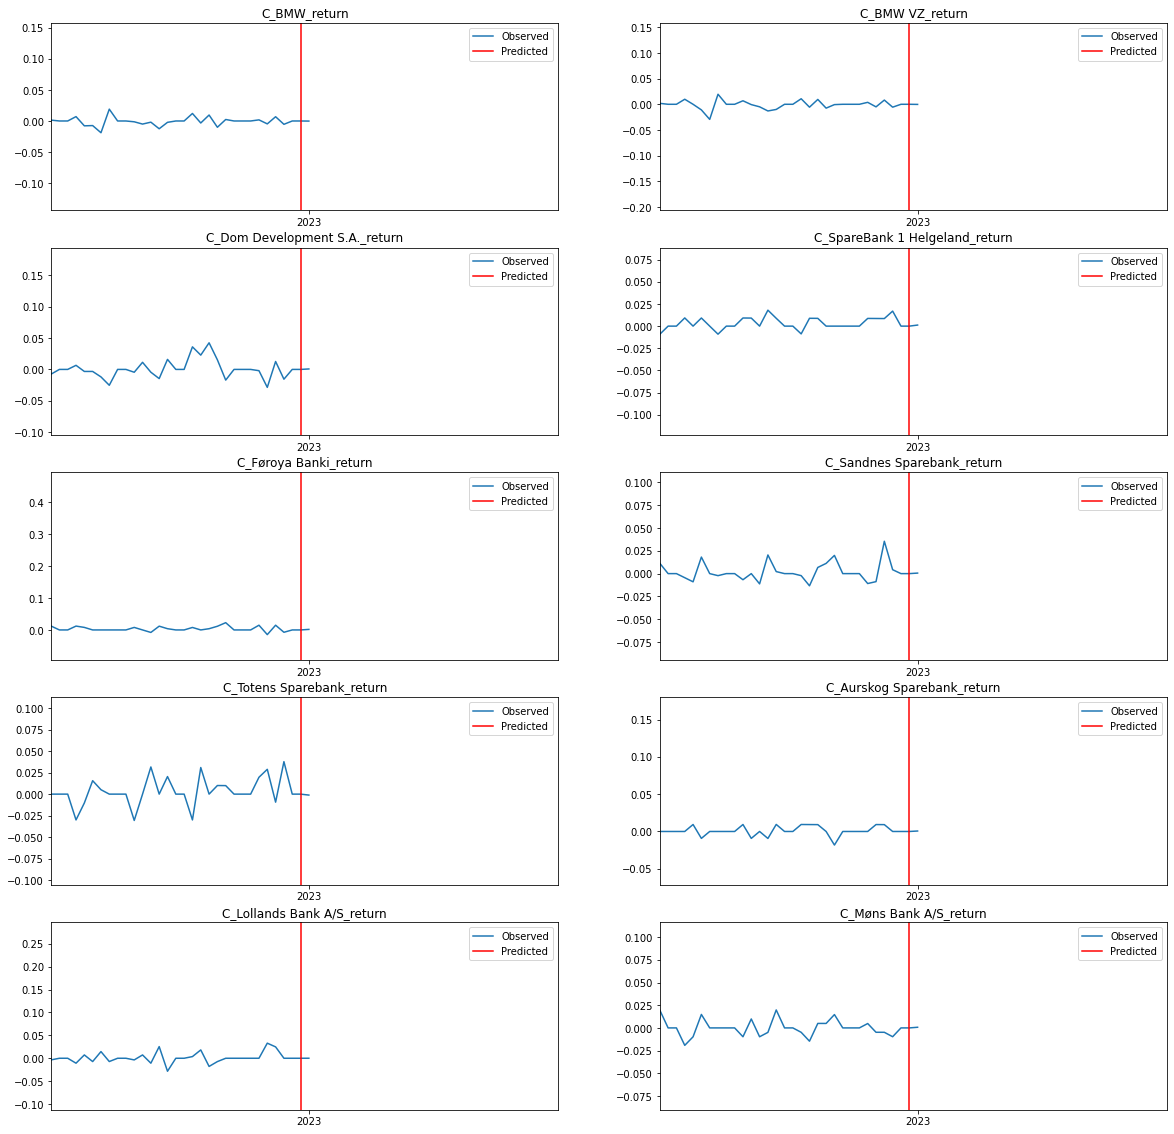

In [101]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
entCpt = 0
pas = 0 
#--> 0 = une seule valeur
#date à prédire
date = "2023-01-01"

predicts = []

for i in range(5):
    for j in range(2):
        courslog = df_train[df_train.columns[entCpt]]
        model = sm.tsa.SARIMAX(courslog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), freq='D')
        sarima = model.fit()
        pred = (sarima.predict(len(courslog), len(courslog) + pas))
        courspred = pd.concat([df_train[df_train.columns[entCpt]], pred])
        predicts.append(pred)

        axs[i, j].plot(courspred) 
        axs[i, j].axvline(x=datetime.date(2022, 12, 31), color='red')
        axs[i, j].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
        axs[i, j].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
        axs[i, j].set_xlim(pd.Timestamp('2022-12-01'), pd.Timestamp('2023-01-31'))
        axs[i, j].legend(['Observed', 'Predicted'])
        axs[i, j].set_title(df_train.columns[entCpt])
        entCpt += 1
plt.show()

**Calcul erreur**

In [99]:
last_date = (predicts[0].index[0]- timedelta(days=1))


last_values = df_top10_return.loc[last_date]
true_values = df_test.iloc[0:1].to_numpy().reshape(10, 1)
msePred = mean_squared_error(true_values, predicts)
mseSameVal = mean_squared_error(true_values, last_values)
maePred = mean_absolute_error(true_values, predicts)
maeSameVal = mean_absolute_error(true_values, last_values)
r2Pred = r2_score(true_values, predicts)
r2SameVal = r2_score(true_values, last_values)

print("[.......Return pour la fermeture des cours.......]\n")
print("Valeurs réelles: ")
print(true_values)
print("Valeurs prédites: ")
print((predicts))
print("Dernière valeur connue: ")
print((last_values))

print("\n")
print("...................")
print("\n")

print("MAE avec les valeurs prédites: " +  str(maePred))
#print("MSE avec les valeurs prédites: " +  str(msePred))
print("R2 score avec les valeurs prédites: " + str(r2Pred))

print("\n")

print("MAE avec les valeurs précédentes: " + str(maeSameVal))
#print("MSE avec les valeurs précédentes: " + str(mseSameVal))
print("R2 score avec les valeurs précédentes: " + str(r2SameVal))

[.......Return pour la fermeture des cours.......]

Valeurs réelles: 
[[ 0.02902385]
 [ 0.02388422]
 [-0.00315795]
 [ 0.02499997]
 [-0.00367648]
 [ 0.        ]
 [-0.00909092]
 [ 0.        ]
 [-0.03114187]
 [ 0.02450985]]
Valeurs prédites: 
[2023-01-01   -0.001058
Freq: D, dtype: float64, 2023-01-01   -0.000986
Freq: D, dtype: float64, 2023-01-01    0.000764
Freq: D, dtype: float64, 2023-01-01    0.001292
Freq: D, dtype: float64, 2023-01-01    0.001404
Freq: D, dtype: float64, 2023-01-01    0.000575
Freq: D, dtype: float64, 2023-01-01   -0.001129
Freq: D, dtype: float64, 2023-01-01    0.000499
Freq: D, dtype: float64, 2023-01-01    0.000039
Freq: D, dtype: float64, 2023-01-01    0.000814
Freq: D, dtype: float64]
Dernière valeur connue: 
C_BMW_return                      0.0
C_BMW VZ_return                   0.0
C_Dom Development S.A._return     0.0
C_SpareBank 1 Helgeland_return    0.0
C_Føroya Banki_return             0.0
C_Sandnes Sparebank_return        0.0
C_Totens Sparebank_return 

**Application du Modèle de régression linéaire**

**Création de J-1**

In [35]:
date = "2023-01-01"

In [36]:
X = pd.DataFrame(index=df_top10_return.index)

for name in df_top10_return.columns: 
    X[name + " J-1"] = df_top10_return[name].shift(1)
X = X.fillna(X.ffill())
X = X.fillna(X.bfill())

**Création de J**

In [37]:
y = df_top10_return

In [38]:
X
#y

,C_BMW_return J-1,C_BMW VZ_return J-1,C_Dom Development S.A._return J-1,C_SpareBank 1 Helgeland_return J-1,C_Føroya Banki_return J-1,C_Sandnes Sparebank_return J-1,C_Totens Sparebank_return J-1,C_Aurskog Sparebank_return J-1,C_Lollands Bank A/S_return J-1,C_Møns Bank A/S_return J-1
Date,,,,,,,,,,
2018-01-01,-0.004952,-0.009914,0.000000,0.011364,0.009434,0.000000,0.000000,0.000000,0.060029,-0.014634
2018-01-02,-0.004952,-0.009914,0.000000,0.011364,0.009434,0.000000,0.000000,0.000000,0.060029,-0.014634
2018-01-03,0.005324,0.002706,-0.005848,0.016854,0.018692,0.009174,0.000000,-0.008451,-0.016575,0.009901
2018-01-04,0.007138,0.017544,0.000000,0.027624,0.018349,-0.018182,0.000000,-0.005682,0.047753,0.000000
2018-01-05,0.011660,0.008621,0.011765,-0.005376,0.000000,0.009259,0.000000,0.000000,-0.002681,0.019608
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,-0.002385,-0.000558,-0.016818,0.000000,0.028846,0.056180,0.000000,0.027778,-0.009174,-0.014218
2023-12-28,0.000398,-0.002235,-0.015789,0.007812,0.003115,-0.051064,-0.005000,0.000000,0.009259,0.024038
2023-12-29,0.003385,0.007279,-0.001337,0.007752,0.021739,0.024664,0.035176,0.000000,0.000000,-0.014084


In [39]:
X.describe()

,C_BMW_return J-1,C_BMW VZ_return J-1,C_Dom Development S.A._return J-1,C_SpareBank 1 Helgeland_return J-1,C_Føroya Banki_return J-1,C_Sandnes Sparebank_return J-1,C_Totens Sparebank_return J-1,C_Aurskog Sparebank_return J-1,C_Lollands Bank A/S_return J-1,C_Møns Bank A/S_return J-1
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,0.000758,0.000864,0.001283,0.000564,0.001321,0.000751,0.000924,0.000668,0.000387,0.000220
std,0.016201,0.016661,0.017772,0.013205,0.020019,0.013106,0.012555,0.009926,0.015576,0.014795
min,-0.129714,-0.189320,-0.090708,-0.113333,-0.182500,-0.085271,-0.095588,-0.060109,-0.093960,-0.080882
25%,-0.004065,-0.004398,-0.004173,0.000000,-0.003781,-0.002200,0.000000,0.000000,-0.003528,-0.004435
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005522,0.005987,0.005261,0.000000,0.004444,0.004082,0.000000,0.000000,0.003396,0.004785
max,0.144724,0.142443,0.180224,0.136567,0.465577,0.101533,0.102531,0.168193,0.278195,0.106977


**Mise en place du modèle**

In [40]:
predicList = pd.DataFrame(index=X.index)

for i in range(y.shape[1]):
    X_ = pd.DataFrame(X.iloc[:,i])
    y_ = y.iloc[:,i]
    model = LinearRegression()
    model.fit(X_, y_)
    y_pred = pd.Series(model.predict(X_), index=X.index)
    predicList[y.columns[i]] = y_pred

In [41]:
df_top10_return.describe()

,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,0.000760,0.000868,0.001283,0.000559,0.001317,0.000751,0.000924,0.000668,0.000359,0.000227
std,0.016201,0.016660,0.017772,0.013203,0.020018,0.013106,0.012555,0.009926,0.015524,0.014791
min,-0.129714,-0.189320,-0.090708,-0.113333,-0.182500,-0.085271,-0.095588,-0.060109,-0.093960,-0.080882
25%,-0.004059,-0.004392,-0.004173,0.000000,-0.003781,-0.002200,0.000000,0.000000,-0.003528,-0.004415
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005522,0.005987,0.005261,0.000000,0.004435,0.004082,0.000000,0.000000,0.003390,0.004785
max,0.144724,0.142443,0.180224,0.136567,0.465577,0.101533,0.102531,0.168193,0.278195,0.106977


In [42]:
print(predicList.loc[date])
print(y.loc[date])

C_BMW_return                      0.000704
C_BMW VZ_return                   0.000818
C_Dom Development S.A._return     0.001234
C_SpareBank 1 Helgeland_return    0.000608
C_Føroya Banki_return             0.001398
C_Sandnes Sparebank_return        0.000799
C_Totens Sparebank_return         0.000892
C_Aurskog Sparebank_return        0.000705
C_Lollands Bank A/S_return        0.000428
C_Møns Bank A/S_return            0.000276
Name: 2023-01-01 00:00:00, dtype: float64
C_BMW_return                      0.029024
C_BMW VZ_return                   0.023884
C_Dom Development S.A._return    -0.003158
C_SpareBank 1 Helgeland_return    0.025000
C_Føroya Banki_return            -0.003676
C_Sandnes Sparebank_return        0.000000
C_Totens Sparebank_return        -0.009091
C_Aurskog Sparebank_return        0.000000
C_Lollands Bank A/S_return       -0.031142
C_Møns Bank A/S_return            0.024510
Name: 2023-01-01 00:00:00, dtype: float64


**Calcul Erreur**

In [43]:
mae = mean_absolute_error(y.loc[date], predicList.loc[date])
mse = mean_squared_error(y.loc[date], predicList.loc[date])
r2 = r2_score(y.loc[date], predicList.loc[date])

print('Mean Absolute Error:', mae)
#print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Absolute Error: 0.015253606824854753
R^2 Score: -0.07355877351060669


**Visualisations**

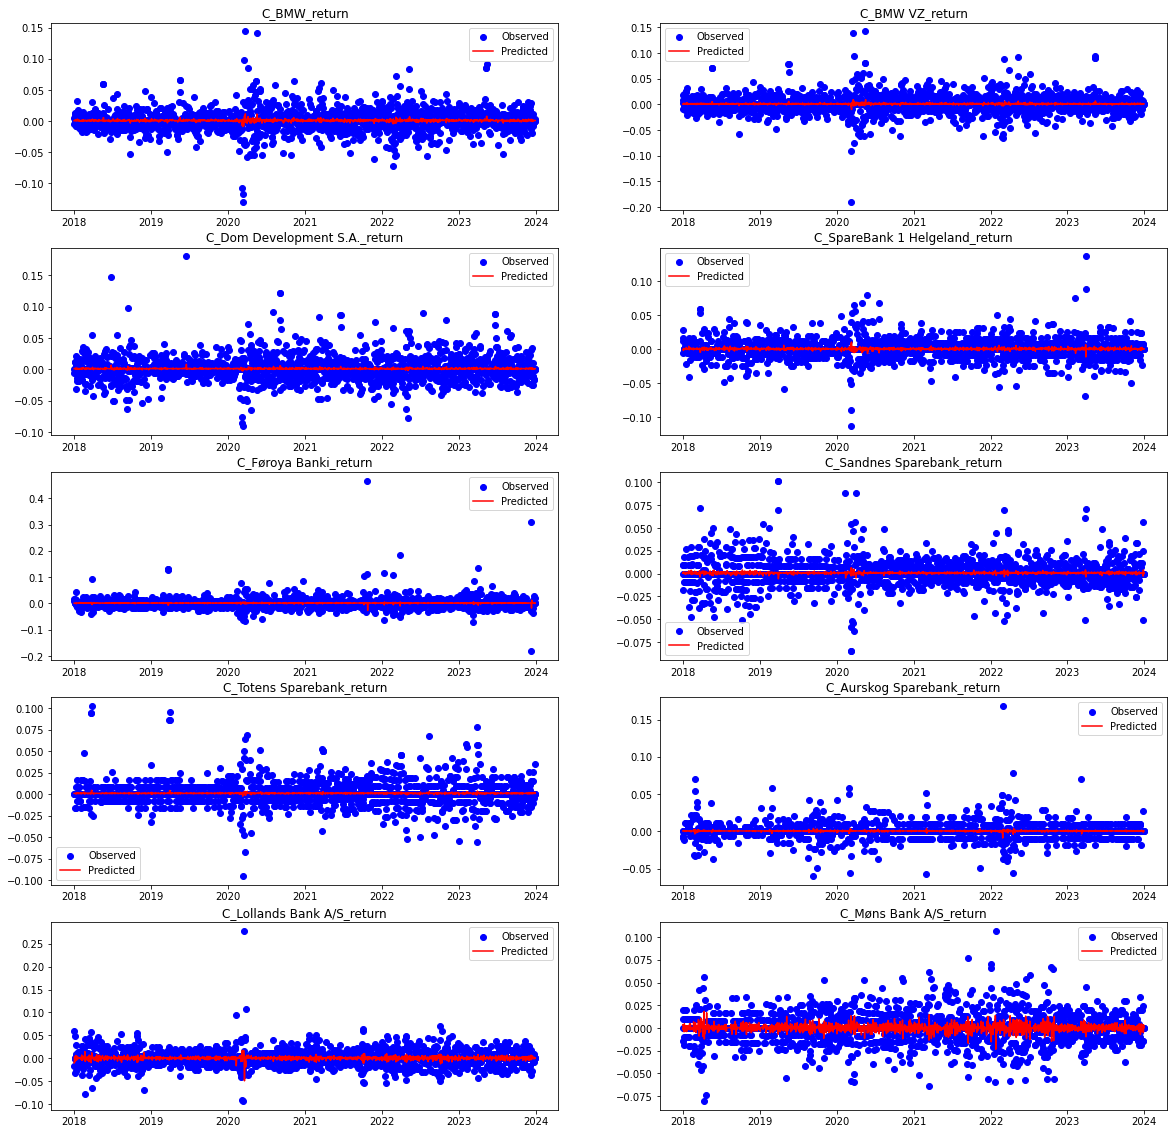

In [44]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
cpt = 0

for i in range(5):
    for j in range(2):
        axs[i, j].scatter(X.iloc[:,cpt].index, y.iloc[:,cpt], color='blue', label='Données')
        axs[i, j].plot(X.iloc[:,cpt].index, predicList.iloc[:,cpt], color='red', label='Régression linéaire')
        axs[i, j].legend(['Observed', 'Predicted'])
        axs[i, j].set_title( y.iloc[:,cpt].name)
        cpt += 1
plt.show()

**Amélioration du modèle de Regression Linéaire**

In [54]:
date = "2023-01-01"

In [55]:
df_moyMob = pd.DataFrame(moyMobile).T
df_moyMob.isna().sum()
df_moyMob

,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.00014,0.000449,-0.003394,0.001556,0.00537,0.002978,0.003018,0.002778,0.000008,-0.000426
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#df_top10 = df_top10.fillna(df_top10.ffill())
#df_top10 = df_top10.fillna(df_top10.bfill())

In [57]:
X = pd.DataFrame(index=df_top10_return.index)

for name in df_top10_return.columns: 
    X[name + " J-1"] = df_top10_return[name].shift(1)
    X[name + " J-2"] = df_top10_return[name].shift(2)
    X[name + " MB"] = df_moyMob[name]
X = X.fillna(X.ffill())
X = X.fillna(X.bfill())

In [58]:
X
y =  df_top10_return

In [59]:
predicList = pd.DataFrame(index=X.index)
cpt = 0

for i in range(y.shape[1]):
    X_ = pd.DataFrame(X.iloc[:, cpt:cpt+3])
    y_ = y.iloc[:,i]
    model = LinearRegression()
    model.fit(X_, y_)
    y_pred = pd.Series(model.predict(X_), index=X.index)
    predicList[y.columns[i]] = y_pred
    cpt += 3

In [60]:
df_moyMob

,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.00014,0.000449,-0.003394,0.001556,0.00537,0.002978,0.003018,0.002778,0.000008,-0.000426
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
print(predicList.loc[date])
print(y.loc[date])

C_BMW_return                      0.008208
C_BMW VZ_return                   0.006273
C_Dom Development S.A._return     0.002527
C_SpareBank 1 Helgeland_return    0.002386
C_Føroya Banki_return             0.002420
C_Sandnes Sparebank_return       -0.000088
C_Totens Sparebank_return         0.000344
C_Aurskog Sparebank_return        0.001123
C_Lollands Bank A/S_return        0.003594
C_Møns Bank A/S_return            0.000141
Name: 2023-01-01 00:00:00, dtype: float64
C_BMW_return                      0.029024
C_BMW VZ_return                   0.023884
C_Dom Development S.A._return    -0.003158
C_SpareBank 1 Helgeland_return    0.025000
C_Føroya Banki_return            -0.003676
C_Sandnes Sparebank_return        0.000000
C_Totens Sparebank_return        -0.009091
C_Aurskog Sparebank_return        0.000000
C_Lollands Bank A/S_return       -0.031142
C_Møns Bank A/S_return            0.024510
Name: 2023-01-01 00:00:00, dtype: float64


In [79]:
mae = mean_absolute_error(y.loc[date], predicList.loc[date])
mse = mean_squared_error(y.loc[date], predicList.loc[date])
r2 = r2_score(y.loc[date], predicList.loc[date])

print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)

Mean Absolute Error: 0.01425721527905525
R^2 Score: 0.056668673335343867


**Tests avec des valeurs extremes**

In [88]:
high = y.loc[(y.abs().mean(axis=1)>=0.02)]
high = high.loc['2023']
high = high.loc[high.mean(axis=1).sort_values().index]
index = high.index
#high["moy"] = high.mean(axis=1)
predicList = predicList.loc['2023']

In [89]:
high

,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,
2023-03-12,-0.037527,-0.033243,-0.018644,-0.028986,-0.069768,-0.008439,-0.026786,-0.009346,-0.006711,0.000000
2023-12-13,0.028589,0.022185,0.005057,0.000000,-0.182500,0.000000,-0.015306,0.009259,0.000000,0.034483
2023-03-09,-0.012057,-0.009179,-0.016667,-0.014286,-0.044444,-0.012500,-0.017544,0.070185,0.006757,-0.009132
2023-03-28,0.001417,0.009204,0.014063,-0.068702,-0.008596,0.061027,0.019608,0.009434,0.010453,-0.009901
2023-03-26,0.009104,0.003808,0.058333,-0.015385,0.041176,0.000000,0.028572,0.000000,0.024561,-0.028302
2023-05-14,0.092244,0.094292,-0.004225,0.000000,-0.007326,-0.004630,0.010204,-0.018692,-0.017544,-0.014634
2023-03-13,0.010144,0.011838,0.053541,0.014925,0.084375,-0.004255,0.018349,0.009434,-0.003378,-0.027650
2023-03-30,0.002582,-0.003698,0.007812,0.088085,0.016949,-0.015909,0.077720,-0.009346,0.000000,0.045000
2023-03-29,0.017689,0.015558,-0.013868,0.136567,0.023121,0.071184,-0.019231,0.000000,0.000000,0.000000


In [90]:
index

DatetimeIndex(['2023-03-12', '2023-12-13', '2023-03-09', '2023-03-28',
               '2023-03-26', '2023-05-14', '2023-03-13', '2023-03-30',
               '2023-03-29', '2023-12-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [92]:
for i in index :
    mae = mean_absolute_error(high.loc[i], predicList.loc[i])
    #mse = mean_squared_error(y.loc, predicList.loc)
    r2 = r2_score(high.loc[i], predicList.loc[i])
    print(i)
    print('Mean Absolute Error:', mae)
    print('R^2 Score:', r2)
    print('\n')

2023-03-12 00:00:00
Mean Absolute Error: 0.021952189303560743
R^2 Score: -1.1494945852981164


2023-12-13 00:00:00
Mean Absolute Error: 0.02577743007881052
R^2 Score: 0.37267881085558907


2023-03-09 00:00:00
Mean Absolute Error: 0.01824555773572191
R^2 Score: 0.1353989716237115


2023-03-28 00:00:00
Mean Absolute Error: 0.020098216643524302
R^2 Score: -0.06471457841509287


2023-03-26 00:00:00
Mean Absolute Error: 0.02098945676070726
R^2 Score: -0.12291614561663522


2023-05-14 00:00:00
Mean Absolute Error: 0.022444415407333912
R^2 Score: 0.29857134703149635


2023-03-13 00:00:00
Mean Absolute Error: 0.0220891988007633
R^2 Score: -0.12752854968078609


2023-03-30 00:00:00
Mean Absolute Error: 0.021279593502514654
R^2 Score: -0.020397422165184143


2023-03-29 00:00:00
Mean Absolute Error: 0.02850292365660964
R^2 Score: 0.0680315912383026


2023-12-12 00:00:00
Mean Absolute Error: 0.040549095552988884
R^2 Score: 0.021669808169341276




**Visualisations**

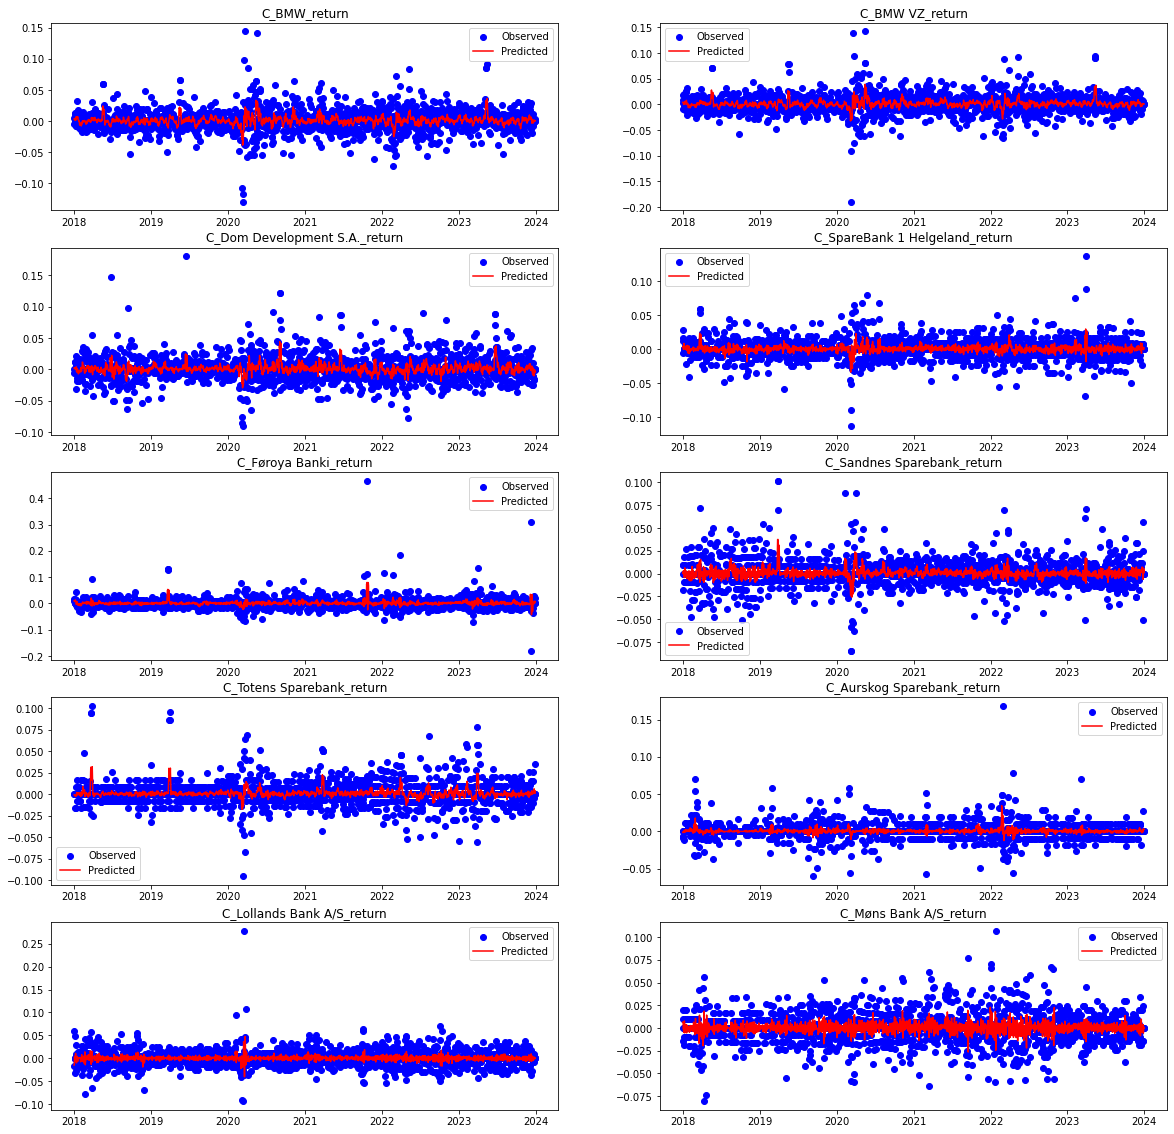

In [170]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
cpt = 0

for i in range(5):
    for j in range(2):
        axs[i, j].scatter(X.iloc[:,cpt].index, y.iloc[:,cpt], color='blue', label='Données')
        axs[i, j].plot(X.iloc[:,cpt].index, predicList.iloc[:,cpt], color='red', label='Régression linéaire')
        axs[i, j].legend(['Observed', 'Predicted'])
        axs[i, j].set_title( y.iloc[:,cpt].name)
        cpt += 1
plt.show()

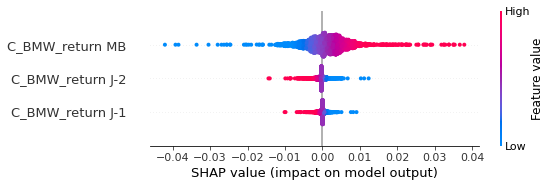

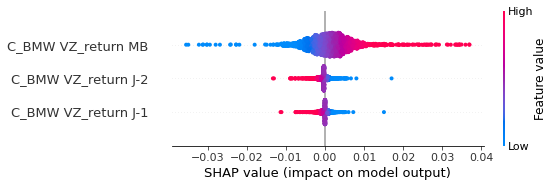

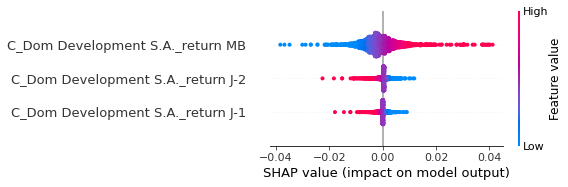

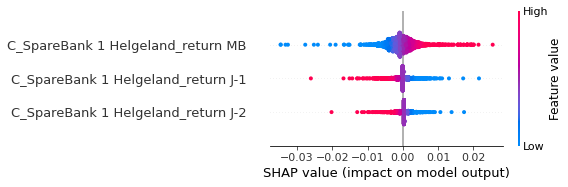

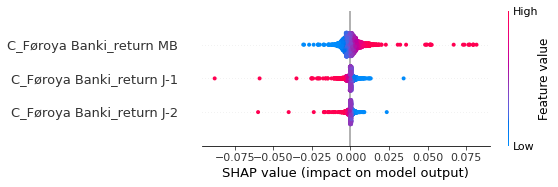

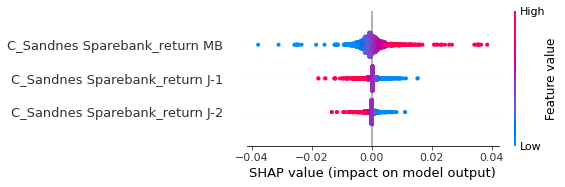

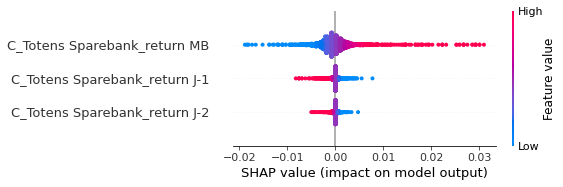

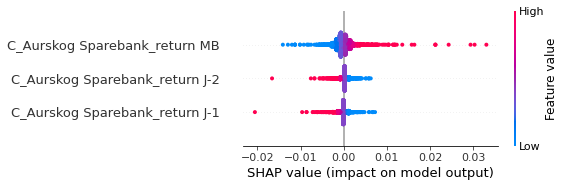

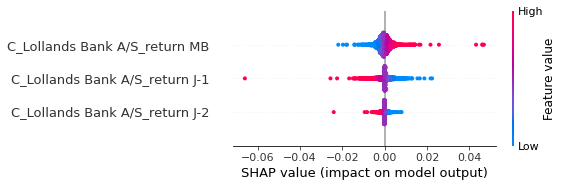

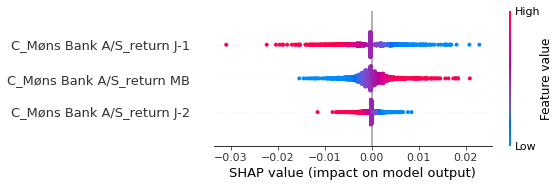

In [171]:
cpt = 0
for i in range(0, X.shape[1], 3):
    X_ = pd.DataFrame(X.iloc[:, i:i+3])
    model = LinearRegression()
    y_ = y.iloc[:,cpt]
    model.fit(X_, y_)
    explainer = shap.Explainer(model, X_)
    shap_values = explainer(X_)
    plt.figure(figsize=(10, 6))  
    shap.summary_plot(shap_values, X_, show=True)  
    cpt += 1

## Back testing

### Selectionner une entreprise test

In [172]:
df_top10_filter

,C_BMW,V_BMW,D_BMW,C_BMW VZ,V_BMW VZ,D_BMW VZ,C_Dom Development S.A.,V_Dom Development S.A.,D_Dom Development S.A.,C_SpareBank 1 Helgeland,...,C_BMW_return,C_BMW VZ_return,C_Dom Development S.A._return,C_SpareBank 1 Helgeland_return,C_Føroya Banki_return,C_Sandnes Sparebank_return,C_Totens Sparebank_return,C_Aurskog Sparebank_return,C_Lollands Bank A/S_return,C_Møns Bank A/S_return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,62.589882,726308.0,0.0,51.617592,34022.0,0.0,47.614487,0.0,0.0,64.438881,...,-0.004952,-0.009914,0.000000,0.011364,0.009434,0.000000,0.000000,0.000000,0.060029,-0.014634
2018-01-02,62.279919,2673332.0,0.0,51.105843,51455.0,0.0,47.614487,0.0,0.0,65.171150,...,0.005324,0.002706,-0.005848,0.016854,0.018692,0.009174,0.000000,-0.008451,-0.016575,0.009901
2018-01-03,62.611511,1396762.0,0.0,51.244160,56366.0,0.0,47.336044,2323.0,0.0,66.269539,...,0.007138,0.017544,0.000000,0.027624,0.018349,-0.018182,0.000000,-0.005682,0.047753,0.000000
2018-01-04,63.058422,1872794.0,0.0,52.143166,52028.0,0.0,47.336044,18914.0,0.0,68.100182,...,0.011660,0.008621,0.011765,-0.005376,0.000000,0.009259,0.000000,0.000000,-0.002681,0.019608
2018-01-05,63.793671,1911027.0,0.0,52.592690,41395.0,0.0,47.892941,1457.0,0.0,67.734055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,100.400002,461826.0,0.0,89.500000,27612.0,0.0,152.000000,12134.0,0.0,117.395691,...,0.000398,-0.002235,-0.015789,0.007812,0.003115,-0.051064,-0.005000,0.000000,0.009259,0.024038
2023-12-28,100.440002,430616.0,0.0,89.300003,21828.0,0.0,149.600006,6039.0,0.0,118.312843,...,0.003385,0.007279,-0.001337,0.007752,0.021739,0.024664,0.035176,0.000000,0.000000,-0.014084
2023-12-29,100.779999,342418.0,0.0,89.949997,20825.0,0.0,149.399994,6502.0,0.0,119.229996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
entreprise = "BMW"

In [51]:
backTest = df_top10_filter.filter(regex = f"{entreprise}$")
backTest

,C_BMW,V_BMW,D_BMW
Date,,,
2018-01-01,62.589882,726308.0,0.0
2018-01-02,62.279919,2673332.0,0.0
2018-01-03,62.611511,1396762.0,0.0
2018-01-04,63.058422,1872794.0,0.0
2018-01-05,63.793671,1911027.0,0.0
...,...,...,...
2023-12-27,100.400002,461826.0,0.0
2023-12-28,100.440002,430616.0,0.0
2023-12-29,100.779999,342418.0,0.0


In [52]:
backTest = df_top10_filter.filter(regex = f"{entreprise}$")
predReturn = predicList.filter(like = entreprise + "_return")
backTest = pd.concat([backTest, predReturn], axis=1)
backTest

,C_BMW,V_BMW,D_BMW,C_BMW_return
Date,,,,
2018-01-01,62.589882,726308.0,0.0,0.003381
2018-01-02,62.279919,2673332.0,0.0,0.003381
2018-01-03,62.611511,1396762.0,0.0,0.002662
2018-01-04,63.058422,1872794.0,0.0,0.001533
2018-01-05,63.793671,1911027.0,0.0,0.001040
...,...,...,...,...
2023-12-27,100.400002,461826.0,0.0,0.000315
2023-12-28,100.440002,430616.0,0.0,0.000353
2023-12-29,100.779999,342418.0,0.0,-0.000128


### Selectionner date ou la valeur de la fermeture du cours baisse ou augmente

In [53]:
backTest

,C_BMW,V_BMW,D_BMW,C_BMW_return
Date,,,,
2018-01-01,62.589882,726308.0,0.0,0.003381
2018-01-02,62.279919,2673332.0,0.0,0.003381
2018-01-03,62.611511,1396762.0,0.0,0.002662
2018-01-04,63.058422,1872794.0,0.0,0.001533
2018-01-05,63.793671,1911027.0,0.0,0.001040
...,...,...,...,...
2023-12-27,100.400002,461826.0,0.0,0.000315
2023-12-28,100.440002,430616.0,0.0,0.000353
2023-12-29,100.779999,342418.0,0.0,-0.000128


In [54]:
quar3 = backTest["C_"+colNames[0]+"_return"].describe().loc["75%"]
quar1 = backTest["C_"+colNames[0]+"_return"].describe().loc["25%"]

In [55]:
high = backTest.loc[backTest["C_"+colNames[0]+"_return"] >  quar3].sort_values(by = "C_"+colNames[0]+"_return", ascending = False)
low = backTest.loc[backTest["C_"+colNames[0]+"_return"] < quar1].sort_values(by = "C_"+colNames[0]+"_return", ascending = True)
high = high[0:20]
low = low[0:20]

### Choisir une date pour laquelle on va acheter et l'autre vendre

In [56]:
def findDateBuySell(dataBuy, dataSell):
    for buy in dataBuy.index:
        for sell in dataSell.index:
            if buy < sell:
                dateAchat = dataBuy.loc[str(buy)]
                dateVente = dataSell.loc[str(sell)]
                break 
        if buy < sell: 
            break 
    return dateAchat, dateVente

def getRendement(dateAchat, dateVente):
    rendement = ((dateVente[0] + dateAchat[2]) - dateAchat[0]) / dateAchat[0]
    return rendement

def moyRendement(dataBuy, dataSell):
    rend = []
    for i in range (0, 20):
        dateAchat, dateVente =  findDateBuySell(dataBuy.sample(frac=1), dataSell.sample(frac=1)) 
        rend.append(getRendement(dateAchat, dateVente))
    return np.mean(rend)

In [57]:
dateAchat, dateVente =  findDateBuySell(high.sample(frac=1), low.sample(frac=1))
getRendement(dateAchat, dateVente)

0.12110722168721688

### Regarder le rendement avec les valeurs réelles

In [58]:
moyRendement(high.sample(frac=1), low.sample(frac=1))

0.49329335922984374

### Comparer avec des valeurs aléatoires 

In [59]:
dateAchat, dateVente = findDateBuySell(backTest.sample(frac=1), backTest.sample(frac=1)) 
getRendement(dateAchat, dateVente)

0.5648926757225687

In [60]:
moyRendement(backTest.sample(frac=1), backTest.sample(frac=1))

0.2879378444685699

In [63]:
high = backTest[backTest.iloc[:, 3] > quar3].sort_values(by=backTest.columns[3], ascending=False)
low = backTest[backTest.iloc[:, 3] < quar1].sort_values(by=backTest.columns[3], ascending=True)

high = high[0:10]
low = low[0:10]

high

,C_BMW,V_BMW,D_BMW,C_BMW_return
Date,,,,
2023-05-17,100.139999,739114.0,0.0,0.036259
2020-05-14,37.328693,4025076.0,0.0,0.033349
2023-05-12,99.410004,2049038.0,8.5,0.032559
2023-05-10,100.194908,1063634.0,0.0,0.032032
2020-05-20,42.578831,1641527.0,0.0,0.031582
2023-05-11,99.900002,1877228.0,0.0,0.031450
2020-05-13,38.636944,2671455.0,0.0,0.031271
2020-05-15,39.061996,3502835.0,2.5,0.028864
2020-05-22,41.934082,1369506.0,0.0,0.028050


## Conclusion

In [ ]:
#Le modèle de regression logistique améliorié prédit mieux que SARIMAX
#Cependant pour un rendement assez haut, le modèle de regression logistique est moin bon

#Pour le backTesting = le return est meilleur si on se base sur nos prédictions 

**Exportation de la table time series**

In [47]:
output_filename = 'X_RL.csv'
X.to_csv(output_filename, index=True)

In [48]:
output_filename = 'predict.csv'
predicList.to_csv(output_filename, index=True)

In [50]:
output_filename = 'dfInfo_return.csv'²
df_top10_return.to_csv(output_filename, index=True)

In [51]:
output_filename = 'dfInfo.csv'
df_top10_filter.to_csv(output_filename, index=True)